In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
def calculate_rent(base_rent, annual_increase_percentage, years):
    # Initialize an empty list to store monthly rent values
    monthly_rents = []
    
    # Loop through each year
    for year in range(years):
        # Loop through each month in the year
        for month in range(12):
            # Append the current base rent to the list
            monthly_rents.append(base_rent)
        
        # Compound the base rent by the annual increase percentage
        base_rent += base_rent * (annual_increase_percentage / 100)
    
    # Create a pandas DataFrame from the monthly rent values
    rent_df = pd.DataFrame(monthly_rents, columns=['Monthly Rent'])
    
    return rent_df

# Example usage



In [2]:
import pandas as pd

def calculate_mortgage_payments(mortgage_value, annual_interest_rate, years=30):
    # Convert the annual interest rate to a monthly rate
    monthly_interest_rate = annual_interest_rate / 12 / 100
    
    # Number of payments for a 30-year mortgage
    number_of_payments = years * 12
    
    # Calculate the monthly payment using the formula
    monthly_payment = mortgage_value * monthly_interest_rate * (1 + monthly_interest_rate) ** number_of_payments / ((1 + monthly_interest_rate) ** number_of_payments - 1)
    
    # List to store the details for each month
    payment_details = []
    
    # Remaining principal starts as the full mortgage value
    remaining_principal = mortgage_value
    
    # Calculate the monthly payments and remaining principal
    for month in range(number_of_payments):
        # Calculate the interest portion of the payment
        interest_payment = remaining_principal * monthly_interest_rate
        
        # Calculate the principal portion of the payment
        principal_payment = monthly_payment - interest_payment
        
        # Reduce the remaining principal by the principal portion of the payment
        remaining_principal -= principal_payment
        
        # Append the details for the month
        payment_details.append((monthly_payment, interest_payment, principal_payment, remaining_principal))
    
    # Create a pandas DataFrame from the payment details
    mortgage_df = pd.DataFrame(payment_details, columns=['Monthly Payment', 'Interest Payment', 'Principal Payment', 'Remaining Principal'])
    
    return mortgage_df


In [3]:
def simulate_rented_savings(rent_df, mortgage_df, annual_investment_rate, additional_payments_df):
    monthly_investment_rate = annual_investment_rate / 12 / 100
    savings = 0
    compounded_savings = []
    total_payments = []
    difference_values = []
    for rent, mortgage, additional_payment in zip(rent_df['Monthly Rent'], mortgage_df['Monthly Payment'], additional_payments_df['Monthly Payment']):
        total_mortgage = mortgage + additional_payment
        total_payments.append(total_mortgage)
        difference = total_mortgage - rent
        difference_values.append(difference)
        if rent < total_mortgage:
            savings += difference
        
        savings += savings * monthly_investment_rate
        compounded_savings.append(savings)
    
    mortgage_df['Actual Payment'] = total_payments
    mortgage_df['Rent'] = rent_df['Monthly Rent']
    mortgage_df['Actual Difference'] = difference_values
    mortgage_df['Compounded Savings'] = compounded_savings

    
    return mortgage_df


In [4]:
def calculate_property_value(initial_value, annual_growth_rate, years, mortgate_df, heloc_df):
    monthly_growth_rate = annual_growth_rate / 12 / 100
    property_values = []
    
    for m,h in zip(mortgage_df['Remaining Principal'], heloc_df['Remaining Principal']):
        
        # Compound the property value at the given growth rate
        initial_value += initial_value * monthly_growth_rate
        
        property_values.append(initial_value - (m+h))
    
    property_value_df = pd.DataFrame(property_values, columns=['Property Value'])
    return property_value_df


In [5]:
# Example usage
years = 30

base_rent = 2050
annual_rent_increase_percentage = 3

annual_investment_rate = 7
initial_value = 600000
annual_growth_rate = 3
mortgage_value = 450000
borrow_interest_rate = 7

additional_investment = 100000
additional_investment_interval = 10 # Every 10 years



rent_df = calculate_rent(base_rent, annual_rent_increase_percentage, years)

mortgage_df = calculate_mortgage_payments(mortgage_value, borrow_interest_rate, 30)


heloc_df = calculate_mortgage_payments(additional_investment, borrow_interest_rate, 10)
zeros_df = pd.DataFrame(0, index=range(120), columns=heloc_df.columns)
heloc_df = pd.concat([zeros_df, heloc_df, heloc_df])

result_df = simulate_rented_savings(rent_df, mortgage_df, annual_investment_rate, heloc_df)
property_value_df = calculate_property_value(initial_value, annual_growth_rate, years, mortgage_df, heloc_df)


result_df['Property Value'] = property_value_df["Property Value"]
result_df

,Monthly Payment,Interest Payment,Principal Payment,Remaining Principal,Actual Payment,Rent,Actual Difference,Compounded Savings,Property Value
0,2993.86,2625.00,368.86,449631.14,2993.86,2050.00,943.86,949.37,151868.86
1,2993.86,2622.85,371.01,449260.13,2993.86,2050.00,943.86,1904.27,153743.62
2,2993.86,2620.68,373.18,448886.95,2993.86,2050.00,943.86,2864.75,155624.31
3,2993.86,2618.51,375.35,448511.59,2993.86,2050.00,943.86,3830.83,157510.94
4,2993.86,2616.32,377.54,448134.05,2993.86,2050.00,943.86,4802.54,159403.54
...,...,...,...,...,...,...,...,...,...
355,2993.86,85.81,2908.05,11802.82,4154.95,4830.96,-676.01,852286.23,1443075.74
356,2993.86,68.85,2925.01,8877.81,4154.95,4830.96,-676.01,857257.90,1450783.77
357,2993.86,51.79,2942.07,5935.73,4154.95,4830.96,-676.01,862258.57,1458524.61
358,2993.86,34.63,2959.24,2976.50,4154.95,4830.96,-676.01,867288.42,1466298.40


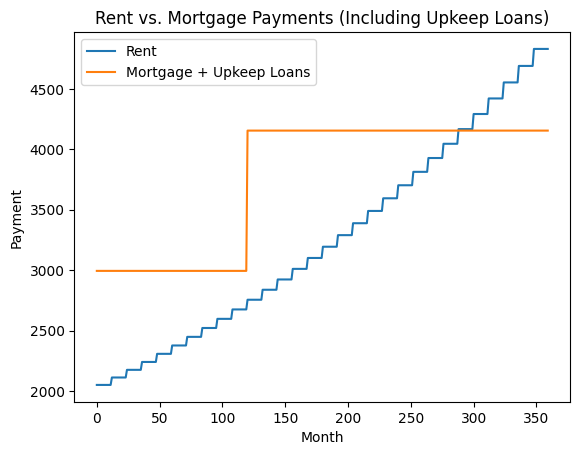

In [122]:
import matplotlib.pyplot as plt

def plot_rent_vs_mortgage(rent_df, mortgage_df):
    # Calculate the total mortgage payments including additional payments
    total_mortgage_payments = mortgage_df['Actual Payment']
    # Plot the monthly rent
    plt.plot(rent_df['Monthly Rent'], label='Rent')
    
    # Plot the total monthly mortgage payments
    plt.plot(total_mortgage_payments, label='Mortgage + Upkeep Loans')
    
    plt.title('Rent vs. Mortgage Payments (Including Upkeep Loans)')
    plt.xlabel('Month')
    plt.ylabel('Payment')
    plt.legend()
    plt.show()

# Example usage
plot_rent_vs_mortgage(rent_df, mortgage_df)


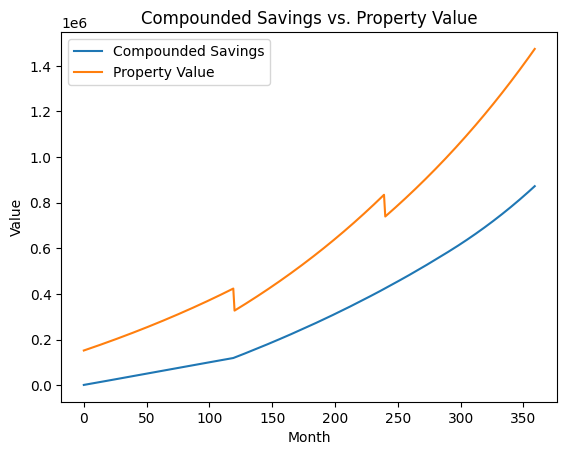

,Monthly Payment,Interest Payment,Principal Payment,Remaining Principal,Actual Payment,Rent,Actual Difference,Compounded Savings,Property Value
0,2993.86,2625.00,368.86,449631.14,2993.86,2050.00,943.86,949.37,151868.86
1,2993.86,2622.85,371.01,449260.13,2993.86,2050.00,943.86,1904.27,153743.62
2,2993.86,2620.68,373.18,448886.95,2993.86,2050.00,943.86,2864.75,155624.31
3,2993.86,2618.51,375.35,448511.59,2993.86,2050.00,943.86,3830.83,157510.94
4,2993.86,2616.32,377.54,448134.05,2993.86,2050.00,943.86,4802.54,159403.54
...,...,...,...,...,...,...,...,...,...
355,2993.86,85.81,2908.05,11802.82,4154.95,4830.96,-676.01,852286.23,1443075.74
356,2993.86,68.85,2925.01,8877.81,4154.95,4830.96,-676.01,857257.90,1450783.77
357,2993.86,51.79,2942.07,5935.73,4154.95,4830.96,-676.01,862258.57,1458524.61
358,2993.86,34.63,2959.24,2976.50,4154.95,4830.96,-676.01,867288.42,1466298.40


In [123]:
def plot_savings_vs_property_value(mortgage_df, heloc_df, property_value_df):
    # Plot the compounded savings
    plt.plot(mortgage_df['Compounded Savings'], label='Compounded Savings')
    
    # Plot the property value
    plt.plot(property_value_df['Property Value'], label='Property Value')
    
    plt.title('Compounded Savings vs. Property Value')
    plt.xlabel('Month')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Example usage
plot_savings_vs_property_value(result_df, heloc_df, property_value_df)
mortgage_df